#### Chinmay Khasanis

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import ODE_solvers as ode

## Gravity IVP

$$
X(t)=\left[\begin{array}{l}
x(t) \\
v(t)
\end{array}\right], \quad F(t)=\left[\begin{array}{l}
v(t) \\
-g
\end{array}\right]
$$
$$
\frac{dX}{dt} = F(t), \quad \text{I.C:}  \quad
X_0=\left[\begin{array}{l}
x(t=0) \\
v(t=0)
\end{array}\right]
$$
$$
\text{eg: Euler's method} \rightarrow \quad X_{n+1} = X_{n} + hF_{n}
$$

#### Solution using Runge-Kutta 4

In [5]:
def Fun(t,X):
    g = 9.8
    return np.array([X[1], -1*g])

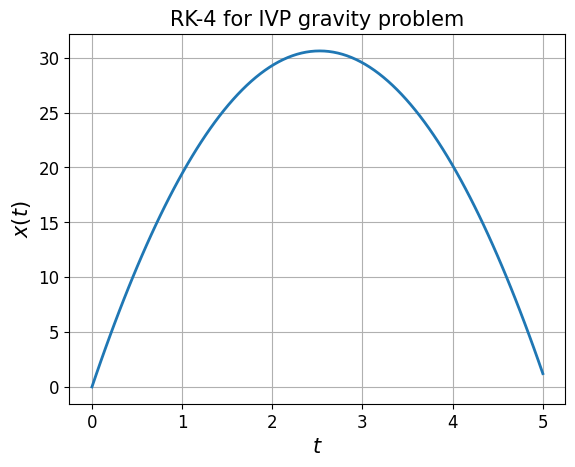

In [6]:
y0 = 0; v0 =24.5
X,t = ode.RK4(X0=np.array([y0,v0]), t0=0.0, tN=5, N=100,F=Fun)
plt.plot(t, X[0,:], linewidth=2)
plt.yticks(fontsize=12); plt.xticks(fontsize=12)
plt.xlabel('$t$',fontsize=15)  ; plt.ylabel('$x(t)$',fontsize=15)
plt.title('RK-4 for IVP gravity problem',fontsize=15)
plt.grid(); plt.show()

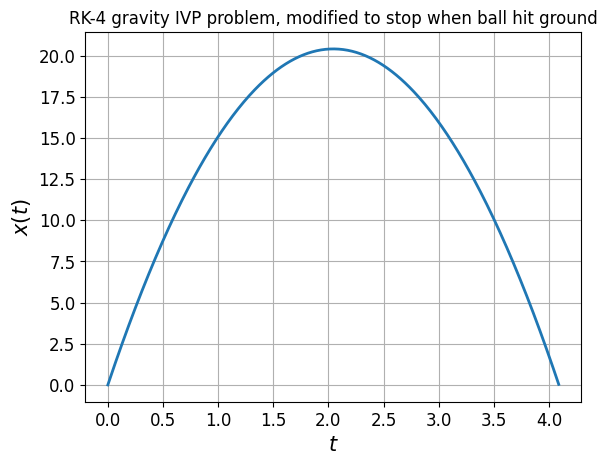

In [7]:
y0 = 0; v0 =20
X,t = ode.RK4_mod(X0=np.array([y0,v0]), t0=0.0, tN=5, N=500,F=Fun)
plt.plot(t, X[0,:], linewidth=2)
plt.yticks(fontsize=12); plt.xticks(fontsize=12)
plt.xlabel('$t$',fontsize=15)  ; plt.ylabel('$x(t)$',fontsize=15)
plt.title('RK-4 gravity IVP problem, modified to stop when ball hit ground',fontsize=12)
plt.grid(); plt.show()

## Gravity BVP

$$
X(t)=\left[\begin{array}{l}
y(t) \\
v(t)
\end{array}\right], \quad F(t)=\left[\begin{array}{l}
v(t) \\
-g
\end{array}\right] , \quad  \frac{dX}{dt} = F(t)
$$

$$
\text{B.C:} \quad y(t=0) = 0, \quad y(t=T) = 0
$$
  
$$
\text{I.C:}  \quad
X(t=0)=\left[\begin{array}{l}
0 \\
S
\end{array}\right],  \quad S = \text{argmin}_S\left[y_n(T) - y_T\right]
$$

#### Solution using Shooting + ode.RK4

In [ ]:
def shoot(v0):
    y0=0.0
    X,t = ode.RK4(X0=np.array([y0,v0]), t0=0.0, tN=5, N=1000,F=Fun)
    return X[0,-1] - 0
v0 = 22
v0 = fsolve(shoot, v0)

In [ ]:
print("computed value of initial velocity is", v0)
X,t = ode.RK4(X0=np.array([y0,v0]), t0=0.0, tN=5, N=1000,F=Fun)
plt.figure(figsize=(8,4))
plt.plot(t, X[0,:], linewidth=2)
plt.yticks(fontsize=12); plt.xticks(fontsize=12)#; plt.legend(fontsize=12)
plt.xlabel('$t$',fontsize=15)  ; plt.ylabel('$y(t)$',fontsize=15)
plt.title('BVP Gravity using Shooting + ode.RK4',fontsize=12)
plt.grid(); plt.show()

## Projectile IVP: Gravity

$$
X(t)=\left[\begin{array}{l}
x(t) \\
y(t) \\
v_{x}(t) \\
v_{y}(t)
\end{array}\right], \quad F(t)=\left[\begin{array}{l}
v_{x}(t) \\
v_{y}(t) \\
  0 \\
-g
\end{array}\right]
$$
$$
\frac{dX}{dt} = F(t), \quad \text{I.C:}  \quad
X_0=\left[\begin{array}{l}
x(t=0) \\
y(t=0) \\
v_{x}(t=0) \\
v_{y}(t=0)
\end{array}\right]
$$

#### Solution using Runge-Kutta 4

In [10]:
def F_G(t,X):
    g = 9.8
    return np.array([X[2],X[3],0,-1*g])

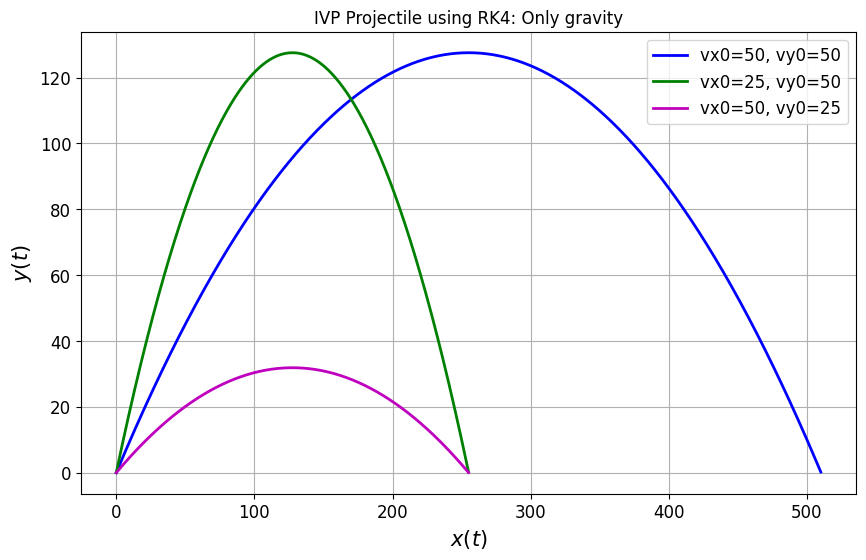

In [11]:
x0 = 0 ; y0 = 0; vx0 = 50; vy0 = 50
X1,t1 = ode.RK4_mod(X0=np.array([x0,y0,vx0,vy0]), t0=0.0, tN=15, N=1000,F=F_G)

x0 = 0 ; y0 = 0; vx0 = 25; vy0 = 50
X2,t2 = ode.RK4_mod(X0=np.array([x0,y0,vx0,vy0]), t0=0.0, tN=15, N=1000,F=F_G)

x0 = 0 ; y0 = 0; vx0 = 50; vy0 = 25
X3,t3 = ode.RK4_mod(X0=np.array([x0,y0,vx0,vy0]), t0=0.0, tN=15, N=1000,F=F_G)
# print(X1[2,0] , X1[3,0]); print(X2[2,0] , X2[3,0]); print(X3[2,0] , X3[3,0])
plt.figure(figsize=(10,6))
plt.plot(X1[0,:], X1[1,:], linewidth=2, label='vx0=50, vy0=50', color='b', alpha=1)
plt.plot(X2[0,:], X2[1,:], linewidth=2, label='vx0=25, vy0=50', color='g', alpha=1)
plt.plot(X3[0,:], X3[1,:], linewidth=2, label='vx0=50, vy0=25', color='m', alpha=1)
plt.yticks(fontsize=12); plt.xticks(fontsize=12); plt.legend(fontsize=12)
plt.xlabel('$x(t)$',fontsize=15)  ; plt.ylabel('$y(t)$',fontsize=15)
plt.title('IVP Projectile using ode.RK4: Only gravity',fontsize=12)
plt.grid(); plt.show()

In [12]:
print('x1(T1) =',X1[0,-1] ,',  T1 =', t1[-1])
print('x2(T2) =',X2[0,-1] ,',  T2 =', t2[-1])
print('x3(T3) =',X3[0,-1] ,',  T3 =', t3[-1])

x1(T1) = 510.0 ,  T1 = 10.21021021021021
x2(T2) = 255.0 ,  T2 = 10.21021021021021
x3(T3) = 255.0 ,  T3 = 5.105105105105105


## Projectile BVP: Gravity

$$
X(t)=\left[\begin{array}{l}
x(t) \\
y(t) \\
v_{x}(t) \\
v_{y}(t)
\end{array}\right], \quad F(t)=\left[\begin{array}{l}
v_{x}(t) \\
v_{y}(t) \\
  0 \\
-g
\end{array}\right]  , \quad  \frac{dX}{dt} = F(t)
$$
$$
\text{B.C:}  \quad
\left[\begin{array}{l}
x(0)\\
y(0)
\end{array}\right]=\left[\begin{array}{l}
0 \\
0
\end{array}\right],
\left[\begin{array}{l}
x(T)\\
y(T)
\end{array}\right]=\left[\begin{array}{l}
x_T \\
y_T
\end{array}\right] \rightarrow
\text{I.C:}  \quad
X_0=\left[\begin{array}{l}
x(0) =0 \\
y(0) =0 \\
v_{x}(0) = S_x\\
v_{y}(0) = S_y
\end{array}\right]
$$

$$
S_x = \text{argmin}_S\{x_n(T) - x_T\} \quad S_y = \text{argmin}_S\{y_n(T) - y_T\}
$$

#### Solution using Shooting + ode.RK4

In [13]:
#### Solution using Shooting + ode.RK4

S_0 = np.array([20,40])
def shoot1(v0):
    X,t = ode.RK4(X0=np.array([0,0,v0[0],v0[1]]), t0=0.0, tN=10, N=1000,F=F_G)
    X_tN = np.array([510,0])
    return X[:2,-1] - X_tN
vx0,vy0 = fsolve(shoot1, S_0)
X1,t1 = ode.RK4(X0=np.array([0,0,vx0,vy0]), t0=0.0, tN=10, N=1000,F=F_G)

def shoot2(v0):
    X,t = ode.RK4(X0=np.array([0,0,v0[0],v0[1]]), t0=0.0, tN=10, N=1000,F=F_G)
    X_tN = np.array([255,0])
    return X[:2,-1] - X_tN
vx0,vy0 = fsolve(shoot2, S_0)
X2,t2 = ode.RK4(X0=np.array([0,0,vx0,vy0]), t0=0.0, tN=10, N=1000,F=F_G)

def shoot3(v0):
    X,t = ode.RK4(X0=np.array([0,0,v0[0],v0[1]]), t0=0.0, tN=5, N=1000,F=F_G)
    X_tN = np.array([255,0])
    return X[:2,-1] - X_tN
vx0,vy0 = fsolve(shoot3, S_0)
X3,t3 = ode.RK4(X0=np.array([0,0,vx0,vy0]), t0=0.0, tN=5, N=1000,F=F_G)

In [14]:
print(X1[2,0] , X1[3,0]); print(X2[2,0] , X2[3,0]); print(X3[2,0] , X3[3,0])
print('x1(T1) =',X1[0,-1] ,',  T1 =', t1[-1])
print('x2(T2) =',X2[0,-1] ,',  T2 =', t2[-1])
print('x3(T3) =',X3[0,-1] ,',  T3 =', t3[-1])

51.05105105105001 48.950999999999716
25.52552552552598 48.95099999999971
51.051051051050536 24.475499999999855
x1(T1) = 510.00000000000335 ,  T1 = 10.0
x2(T2) = 255.00000000000742 ,  T2 = 10.0
x3(T3) = 255.00000000000207 ,  T3 = 5.0


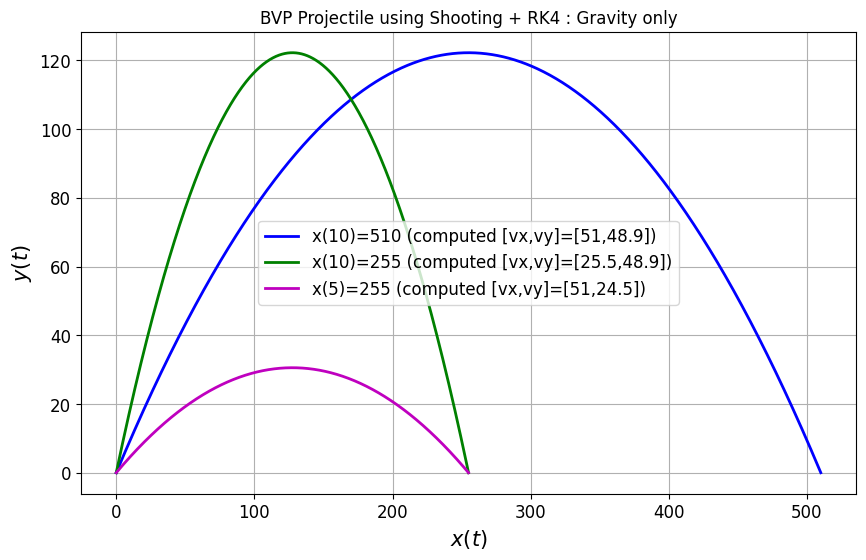

In [15]:
plt.figure(figsize=(10,6))
plt.plot(X1[0,:], X1[1,:], linewidth=2, label='x(10)=510 (computed [vx,vy]=[51,48.9])', color='b', alpha=1)
plt.plot(X2[0,:], X2[1,:], linewidth=2, label='x(10)=255 (computed [vx,vy]=[25.5,48.9])', color='g', alpha=1)
plt.plot(X3[0,:], X3[1,:], linewidth=2, label='x(5)=255 (computed [vx,vy]=[51,24.5])', color='m', alpha=1)

plt.yticks(fontsize=12); plt.xticks(fontsize=12); plt.legend(fontsize=12)
plt.xlabel('$x(t)$',fontsize=15)  ; plt.ylabel('$y(t)$',fontsize=15)
plt.title('BVP Projectile using Shooting + ode.RK4 : Gravity only',fontsize=12)
plt.grid(); plt.show()

## Projectile IVP: Drag + Gravity

$$
X(t)=\left[\begin{array}{l}
x(t) \\
y(t) \\
v_{x}(t) \\
v_{y}(t)
\end{array}\right], \quad F(t)=\left[\begin{array}{l}
v_{x}(t) \\
v_{y}(t) \\
   - \eta v v_{x}(t) \\
-g - \eta v v_{y}(t)
\end{array}\right]
$$
$$
\frac{dX}{dt} = F(t), \quad \text{I.C:}  \quad
X_0=\left[\begin{array}{l}
x(t=0) \\
y(t=0) \\
v_{x}(t=0) \\
v_{y}(t=0)
\end{array}\right]
$$

#### Solution using Runge-Kutta 4

In [16]:
def F_GD(t,X):
    g = 9.8
    n = 4e-5
    v=np.sqrt(X[2]**2+X[3]**2)
    return np.array([X[2], X[3], -1*n*v*X[2], -1*g- n*v*X[3]])

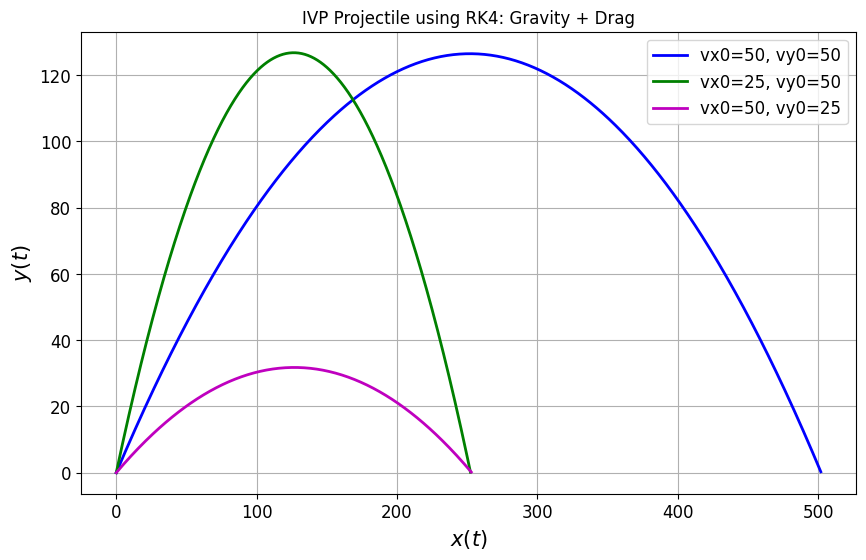

In [17]:
x0 = 0 ; y0 = 0; vx0 = 50; vy0 = 50
X1,t1 = ode.RK4_mod(X0=np.array([x0,y0,vx0,vy0]), t0=0.0, tN=15, N=1000,F=F_GD)

x0 = 0 ; y0 = 0; vx0 = 25; vy0 = 50
X2,t2 = ode.RK4_mod(X0=np.array([x0,y0,vx0,vy0]), t0=0.0, tN=15, N=1000,F=F_GD)

x0 = 0 ; y0 = 0; vx0 = 50; vy0 = 25
X3,t3 = ode.RK4_mod(X0=np.array([x0,y0,vx0,vy0]), t0=0.0, tN=15, N=1000,F=F_GD)
# print(X1[2,0] , X1[3,0]); print(X2[2,0] , X2[3,0]); print(X3[2,0] , X3[3,0])
plt.figure(figsize=(10,6))
plt.plot(X1[0,:], X1[1,:], linewidth=2, label='vx0=50, vy0=50', color='b', alpha=1)
plt.plot(X2[0,:], X2[1,:], linewidth=2, label='vx0=25, vy0=50', color='g', alpha=1)
plt.plot(X3[0,:], X3[1,:], linewidth=2, label='vx0=50, vy0=25', color='m', alpha=1)
plt.yticks(fontsize=12); plt.xticks(fontsize=12); plt.legend(fontsize=12)
plt.xlabel('$x(t)$',fontsize=15)  ; plt.ylabel('$y(t)$',fontsize=15)
plt.title('IVP Projectile using ode.RK4: Gravity + Drag',fontsize=12)
plt.grid(); plt.show()

In [18]:
print('x1(T1) =',X1[0,-1] ,',  T1 =', t1[-1])
print('x2(T2) =',X2[0,-1] ,',  T2 =', t2[-1])
print('x3(T3) =',X3[0,-1] ,',  T3 =', t3[-1])

x1(T1) = 501.9168957420974 ,  T1 = 10.165165165165165
x2(T2) = 252.35443175735546 ,  T2 = 10.18018018018018
x3(T3) = 252.91436303720744 ,  T3 = 5.09009009009009


## Projectile BVP: Drag + Gravity

$$
\text{Drag force:} \quad F_{drag} = -\eta v v_i, \quad \text{where}, v=\sqrt{v_x^2 + v_y^2},    i\in\{x,y\} \\
$$
$$
X(t)=\left[\begin{array}{l}
x(t) \\
y(t) \\
v_{x}(t) \\
v_{y}(t)
\end{array}\right], \quad F(t)=\left[\begin{array}{l}
v_{x}(t) \\
v_{y}(t) \\
   - \eta v v_{x}(t) \\
-g - \eta v v_{y}(t)
\end{array}\right]  , \quad  \frac{dX}{dt} = F(t)
$$
$$
\text{B.C:}  \quad
\left[\begin{array}{l}
x(0)\\
y(0)
\end{array}\right]=\left[\begin{array}{l}
0 \\
0
\end{array}\right],
\left[\begin{array}{l}
x(T)\\
y(T)
\end{array}\right]=\left[\begin{array}{l}
x_T \\
y_T
\end{array}\right] \rightarrow
\text{I.C:}  \quad
X_0=\left[\begin{array}{l}
x(0) =0 \\
y(0) =0 \\
v_{x}(0) = S_x\\
v_{y}(0) = S_y
\end{array}\right]
$$

$$
S_x = \text{argmin}_S\{x_n(T) - x_T\} \quad S_y = \text{argmin}_S\{y_n(T) - y_T\}
$$

#### Solution using Shooting + ode.RK4

In [19]:
def F_GD(t,X):
    g = 9.8
    n = 4e-5
    v=np.sqrt(X[2]**2+X[3]**2)
    return np.array([X[2], X[3], -1*n*v*X[2], -1*g- n*v*X[3]])

In [20]:
#### Solution using Shooting + ode.RK4

S_0 = np.array([20,40])
def shoot1(v0):
    X,t = ode.RK4(X0=np.array([0,0,v0[0],v0[1]]), t0=0.0, tN=10, N=1000,F=F_GD)
    X_tN = np.array([510,0])
    return X[:2,-1] - X_tN
vx0,vy0 = fsolve(shoot1, S_0)
X1,t1 = ode.RK4(X0=np.array([0,0,vx0,vy0]), t0=0.0, tN=10, N=1000,F=F_GD)

def shoot2(v0):
    X,t = ode.RK4(X0=np.array([0,0,v0[0],v0[1]]), t0=0.0, tN=10, N=1000,F=F_GD)
    X_tN = np.array([255,0])
    return X[:2,-1] - X_tN
vx0,vy0 = fsolve(shoot2, S_0)
X2,t2 = ode.RK4(X0=np.array([0,0,vx0,vy0]), t0=0.0, tN=10, N=1000,F=F_GD)

def shoot3(v0):
    X,t = ode.RK4(X0=np.array([0,0,v0[0],v0[1]]), t0=0.0, tN=5, N=1000,F=F_GD)
    X_tN = np.array([255,0])
    return X[:2,-1] - X_tN
vx0,vy0 = fsolve(shoot3, S_0)
X3,t3 = ode.RK4(X0=np.array([0,0,vx0,vy0]), t0=0.0, tN=5, N=1000,F=F_GD)

In [21]:
print(X1[2,0] , X1[3,0]); print(X2[2,0] , X2[3,0]); print(X3[2,0] , X3[3,0])
print('x1(T1) =',X1[0,-1] ,',  T1 =', t1[-1])
print('x2(T2) =',X2[0,-1] ,',  T2 =', t2[-1])
print('x3(T3) =',X3[0,-1] ,',  T3 =', t3[-1])

51.647258181051264 49.15945365340718
25.714789073524894 49.098692890656324
51.321989853901464 24.52008284476833
x1(T1) = 509.99999999902025 ,  T1 = 10.0
x2(T2) = 254.9999999999695 ,  T2 = 10.0
x3(T3) = 255.0000000000603 ,  T3 = 5.0


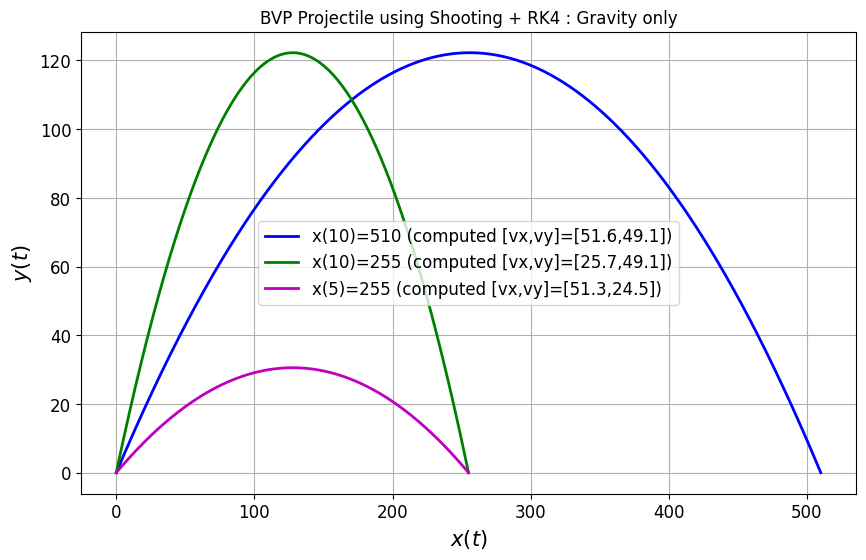

In [22]:
plt.figure(figsize=(10,6))
plt.plot(X1[0,:], X1[1,:], linewidth=2, label='x(10)=510 (computed [vx,vy]=[51.6,49.1])', color='b', alpha=1)
plt.plot(X2[0,:], X2[1,:], linewidth=2, label='x(10)=255 (computed [vx,vy]=[25.7,49.1])', color='g', alpha=1)
plt.plot(X3[0,:], X3[1,:], linewidth=2, label='x(5)=255 (computed [vx,vy]=[51.3,24.5])', color='m', alpha=1)
plt.yticks(fontsize=12); plt.xticks(fontsize=12); plt.legend(fontsize=12)
plt.xlabel('$x(t)$',fontsize=15)  ; plt.ylabel('$y(t)$',fontsize=15)
plt.title('BVP Projectile using Shooting + ode.RK4 : Gravity only',fontsize=12)
plt.grid(); plt.show()

## Projectile IVP: Thrust + Gravity + Drag

$$
X(t)=\left[\begin{array}{l}
x(t) \\
y(t) \\
v_{x}(t) \\
v_{y}(t)
\end{array}\right],  \quad \gamma_{x}(t)  = \frac{v_x(t)}{\sqrt{v_x^2 + v_y^2}}  \quad  \gamma_{y}(t)  = \frac{v_y(t)}{\sqrt{v_x^2 + v_y^2}}
$$

$$
\text{Drag force:} \quad F_{drag} = -\eta v v_i, \quad \text{where}, v=\sqrt{v_x^2 + v_y^2}, i\in\{x,y\} \quad\text{Thrust:} \quad T = \text{constant}  \\
$$

$$
F(t)=\left[\begin{array}{l}
v_{x}(t) \\
v_{y}(t) \\
- \eta v v_{x}(t)  + T\gamma_{x}\\
-g - \eta v v_{y}(t) + T\gamma_{y}
\end{array}\right]
$$

$$
\frac{dX}{dt} = F(t), \quad \text{I.C:}  \quad
X_0=\left[\begin{array}{l}
x(t=0) \\
y(t=0) \\
v_{x}(t=0) \\
v_{y}(t=0)
\end{array}\right]
$$

#### Solution using Runge-Kutta 4

In [23]:
def F_GDT(t,X):
    g = 9.8;  T = 5
    n = 4e-5
    v=np.sqrt(X[2]**2+X[3]**2)
    gamx  = X[2]/v
    gamy  = X[3]/v
    return np.array([X[2], X[3], -1*n*v*X[2]+T*gamx, -1*g- n*v*X[3]+T*gamy])

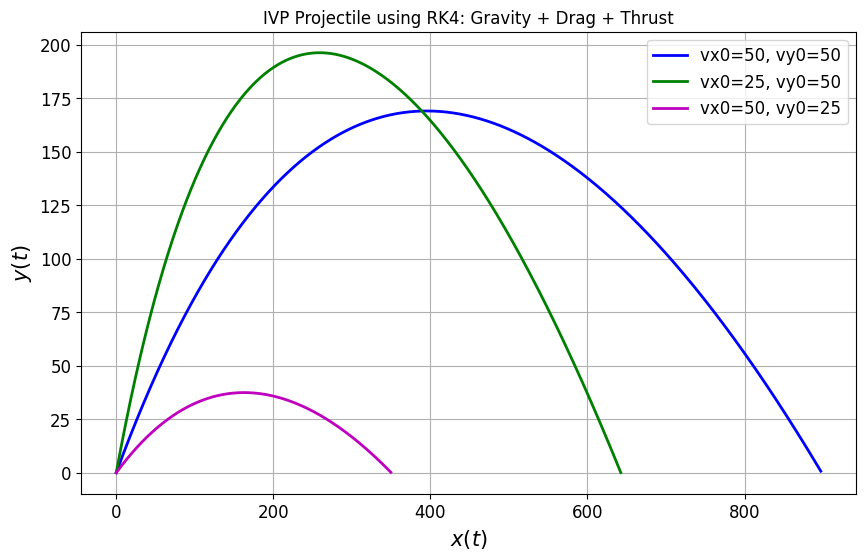

In [24]:
x0 = 0 ; y0 = 0; vx0 = 50; vy0 = 50
X1,t1 = ode.RK4_mod(X0=np.array([x0,y0,vx0,vy0]), t0=0.0, tN=15, N=1000,F=F_GDT)
x0 = 0 ; y0 = 0; vx0 = 25; vy0 = 50
X2,t2 = ode.RK4_mod(X0=np.array([x0,y0,vx0,vy0]), t0=0.0, tN=15, N=1000,F=F_GDT)
x0 = 0 ; y0 = 0; vx0 = 50; vy0 = 25
X3,t3 = ode.RK4_mod(X0=np.array([x0,y0,vx0,vy0]), t0=0.0, tN=15, N=1000,F=F_GDT)
plt.figure(figsize=(10,6))
plt.plot(X1[0,:], X1[1,:], linewidth=2, label='vx0=50, vy0=50', color='b', alpha=1)
plt.plot(X2[0,:], X2[1,:], linewidth=2, label='vx0=25, vy0=50', color='g', alpha=1)
plt.plot(X3[0,:], X3[1,:], linewidth=2, label='vx0=50, vy0=25', color='m', alpha=1)
plt.yticks(fontsize=12); plt.xticks(fontsize=12); plt.legend(fontsize=12)
plt.xlabel('$x(t)$',fontsize=15)  ; plt.ylabel('$y(t)$',fontsize=15)
plt.title('IVP Projectile using ode.RK4: Gravity + Drag + Thrust',fontsize=12)
plt.grid(); plt.show()

In [25]:
print('x1(T1) =',X1[0,-1] ,',  T1 =', t1[-1])
print('x2(T2) =',X2[0,-1] ,',  T2 =', t2[-1])
print('x3(T3) =',X3[0,-1] ,',  T3 =', t3[-1])

x1(T1) = 897.1363484608943 ,  T1 = 11.906906906906906
x2(T2) = 642.4577916051053 ,  T2 = 13.033033033033034
x3(T3) = 349.61992785886036 ,  T3 = 5.555555555555555


## Projectile BVP: Thrust + Gravity + Drag

$$
X(t)=\left[\begin{array}{l}
x(t) \\
y(t) \\
v_{x}(t) \\
v_{y}(t)
\end{array}\right],  \quad \gamma_{x}(t)  = \frac{v_x(t)}{\sqrt{v_x^2 + v_y^2}}  \quad  \gamma_{y}(t)  = \frac{v_y(t)}{\sqrt{v_x^2 + v_y^2}}
$$

$$
\text{Drag force:} \quad F_{drag} = -\eta v v_i, \quad \text{where}, v=\sqrt{v_x^2 + v_y^2}, i\in\{x,y\} \quad\text{Thrust:} \quad T = \text{constant}  \\
$$
$$
F(t)=\left[\begin{array}{l}
v_{x}(t) \\
v_{y}(t) \\
- \eta v v_{x}(t)  + T\gamma_{x}\\
-g - \eta v v_{y}(t) + T\gamma_{y}
\end{array}\right]   , \quad   \frac{dX}{dt} = F(t)
$$

$$
\text{B.C:}  \quad
\left[\begin{array}{l}
x(0)\\
y(0)
\end{array}\right]=\left[\begin{array}{l}
0 \\
0
\end{array}\right],
\left[\begin{array}{l}
x(T)\\
y(T)
\end{array}\right]=\left[\begin{array}{l}
x_T \\
y_T
\end{array}\right] \rightarrow
\text{I.C:}  \quad
X_0=\left[\begin{array}{l}
x(0) =0 \\
y(0) =0 \\
v_{x}(0) = S_x\\
v_{y}(0) = S_y
\end{array}\right]
$$

$$
S_x = \text{argmin}_S\{x_n(T) - x_T\} \quad S_y = \text{argmin}_S\{y_n(T) - y_T\}
$$

#### Solution using Shooting + ode.RK4

In [26]:
def F_GDT(t,X):
    g = 9.8;  T = 5
    n = 4e-5
    v=np.sqrt(X[2]**2+X[3]**2)
    gamx  = X[2]/v
    gamy  = X[3]/v
    return np.array([X[2], X[3], -1*n*v*X[2]+T*gamx, -1*g- n*v*X[3]+T*gamy])

In [27]:
#### Solution using Shooting + ode.RK4

S_0 = np.array([20,40])
def shoot1(v0):
    X,t = ode.RK4(X0=np.array([0,0,v0[0],v0[1]]), t0=0.0, tN=10, N=1000,F=F_GDT)
    X_tN = np.array([510,0])
    return X[:2,-1] - X_tN
vx0,vy0 = fsolve(shoot1, S_0)
X1,t1 = ode.RK4(X0=np.array([0,0,vx0,vy0]), t0=0.0, tN=10, N=1000,F=F_GDT)

def shoot2(v0):
    X,t = ode.RK4(X0=np.array([0,0,v0[0],v0[1]]), t0=0.0, tN=10, N=1000,F=F_GDT)
    X_tN = np.array([255,0])
    return X[:2,-1] - X_tN
vx0,vy0 = fsolve(shoot2, S_0)
X2,t2 = ode.RK4(X0=np.array([0,0,vx0,vy0]), t0=0.0, tN=10, N=1000,F=F_GDT)

def shoot3(v0):
    X,t = ode.RK4(X0=np.array([0,0,v0[0],v0[1]]), t0=0.0, tN=5, N=1000,F=F_GDT)
    X_tN = np.array([255,0])
    return X[:2,-1] - X_tN
vx0,vy0 = fsolve(shoot3, S_0)
X3,t3 = ode.RK4(X0=np.array([0,0,vx0,vy0]), t0=0.0, tN=5, N=1000,F=F_GDT)

In [28]:
print(X1[2,0] , X1[3,0]); print(X2[2,0] , X2[3,0]); print(X3[2,0] , X3[3,0])
print('x1(T1) =',X1[0,-1] ,',  T1 =', t1[-1])
print('x2(T2) =',X2[0,-1] ,',  T2 =', t2[-1])
print('x3(T3) =',X3[0,-1] ,',  T3 =', t3[-1])

30.327186784254312 40.35571410755777
9.882892370760292 35.79329679336161
39.33252675172997 22.218715531109915
x1(T1) = 510.0000000055855 ,  T1 = 10.0
x2(T2) = 254.99999999999983 ,  T2 = 10.0
x3(T3) = 255.00000000010428 ,  T3 = 5.0


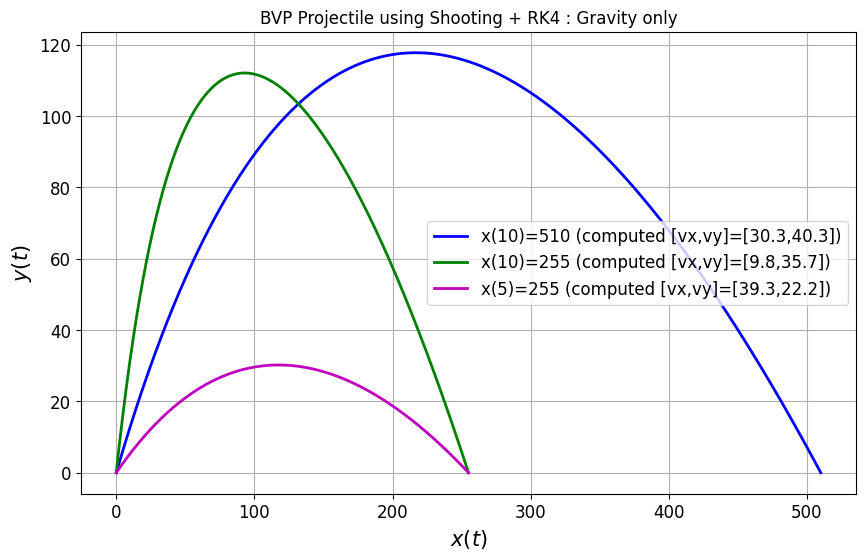

In [29]:
plt.figure(figsize=(10,6))
plt.plot(X1[0,:], X1[1,:], linewidth=2, label='x(10)=510 (computed [vx,vy]=[30.3,40.3])', color='b', alpha=1)
plt.plot(X2[0,:], X2[1,:], linewidth=2, label='x(10)=255 (computed [vx,vy]=[9.8,35.7])', color='g', alpha=1)
plt.plot(X3[0,:], X3[1,:], linewidth=2, label='x(5)=255 (computed [vx,vy]=[39.3,22.2])', color='m', alpha=1)
plt.yticks(fontsize=12); plt.xticks(fontsize=12); plt.legend(fontsize=12)
plt.xlabel('$x(t)$',fontsize=15)  ; plt.ylabel('$y(t)$',fontsize=15)
plt.title('BVP Projectile using Shooting + ode.RK4 : Gravity only',fontsize=12)
plt.grid(); plt.show()

## Magnus effect

$$
X(t)=\left[\begin{array}{l}
x(t) \\
y(t) \\
z(t) \\
v_{x}(t) \\
v_{y}(t) \\
v_{z}(t)
\end{array}\right],  \quad \gamma_{i}(t)  = \frac{v_i(t)}{\sqrt{v_x^2 + v_y^2 + v_z^2}} \quad i \in  \{x,y,z\}
$$

$$
\text{Magnus force:} \quad F_{M_z} = -s_{0} \omega v_x, \quad s_{0} \approx 6*10^{-2} \quad  \omega=\text{angular velocity}
$$

$$
\text{Drag force:} \quad F_{drag} = -\eta v v_i, \quad v=\sqrt{\sum{v_i^2}}, i\in\{x,y\} \quad \text{ignoring contribution of }v_z \text{ for drag}
$$

$$
F(t)=\left[\begin{array}{l}
v_{x}(t) \\
v_{y}(t) \\
v_{z}(t) \\
- \eta v v_{x}(t) \\
-g - \eta v v_{y}(t)\\
-s_{0} \omega v_x
\end{array}\right] \quad   \frac{dX}{dt} = F(t)
$$

$$
\text{B.C:}  \quad
\left[\begin{array}{l}
x(0)\\
y(0) \\
z(0)
\end{array}\right]=\left[\begin{array}{l}
0 \\
y_0 \\
0
\end{array}\right],
\left[\begin{array}{l}
x(T)\\
y(T) \\
z(T)
\end{array}\right]=\left[\begin{array}{l}
x_T \\
y_T \\
z_T
\end{array}\right] \rightarrow
\text{I.C:}  \quad
X_0=\left[\begin{array}{l}
x(0) =0 \\
y(0) =y_0 \\
z(0) =0 \\
v_{x}(0) = S_x\\
v_{y}(0) = S_y \\
v_{z}(0) = S_z
\end{array}\right]
$$

$$
S_x = \text{argmin}_S\{x_n(T) - x_T\} \quad S_y = \text{argmin}_S\{y_n(T) - y_T\} \quad S_z = \text{argmin}_S\{z_n(T) - z_T\}
$$

#### Magnus IVP: Solution ode.RK4

In [30]:
def F_Magnus1(t,X):
    g = 9.8; S = 6e-3; n = 4e-5;  w = 0.25
    v=np.sqrt(X[3]**2+X[4]**2)
    return np.array([X[3], X[4], X[5],  -1*n*v*X[3], -1*g- n*v*X[4], -1*S*w*X[3]])

def F_Magnus2(t,X):
    g = 9.8; S = 6e-3; n = 4e-5;  w = -0.25
    v=np.sqrt(X[3]**2+X[4]**2)
    return np.array([X[3], X[4], X[5],  -1*n*v*X[3], -1*g- n*v*X[4], -1*S*w*X[3]])

def F_Magnus3(t,X):
    g = 9.8; S = 6e-3; n = 4e-5;  w = 0
    v=np.sqrt(X[3]**2+X[4]**2)
    return np.array([X[3], X[4], X[5],  -1*n*v*X[3], -1*g- n*v*X[4], -1*S*w*X[3]])

In [32]:
x0 = 0 ; y0 = 100; z0 = 0; vx0 = 50; vy0 = 10; vz0 = 0
Xm1,tm1 = ode.RK4_mod(X0=np.array([x0,y0,z0,vx0,vy0,vz0]), t0=0.0, tN=15, N=1000,F=F_Magnus1)
Xm2,tm2 = ode.RK4_mod(X0=np.array([x0,y0,z0,vx0,vy0,vz0]), t0=0.0, tN=15, N=1000,F=F_Magnus2)
Xm3,tm3 = ode.RK4_mod(X0=np.array([x0,y0,z0,vx0,vy0,vz0]), t0=0.0, tN=15, N=1000,F=F_Magnus3)

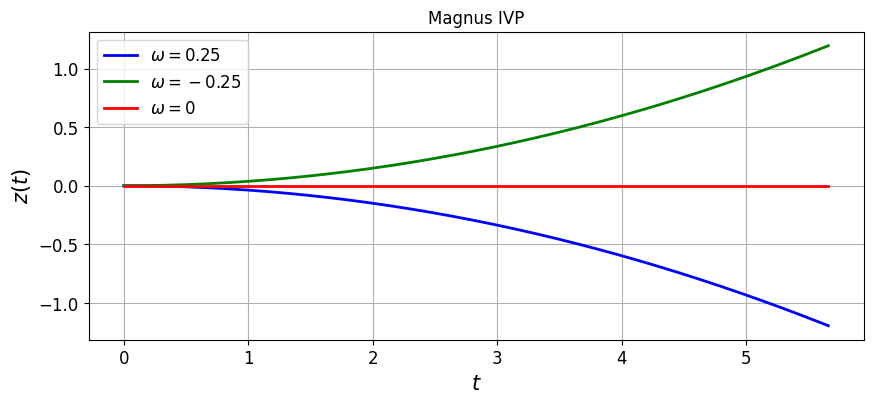

In [33]:
plt.figure(figsize=(10,4))
plt.plot(tm1, Xm1[2,:], linewidth=2, label='$\omega = 0.25$', color='b', alpha=1)
plt.plot(tm2, Xm2[2,:], linewidth=2, label='$\omega = -0.25$', color='g', alpha=1)
plt.plot(tm3, Xm3[2,:], linewidth=2, label='$\omega = 0$', color='r', alpha=1)
plt.yticks(fontsize=12); plt.xticks(fontsize=12); plt.legend(fontsize=12)
plt.xlabel('$t$',fontsize=15)  ; plt.ylabel('$z(t)$',fontsize=15)
plt.title('Magnus IVP',fontsize=12)
plt.grid(); plt.show()

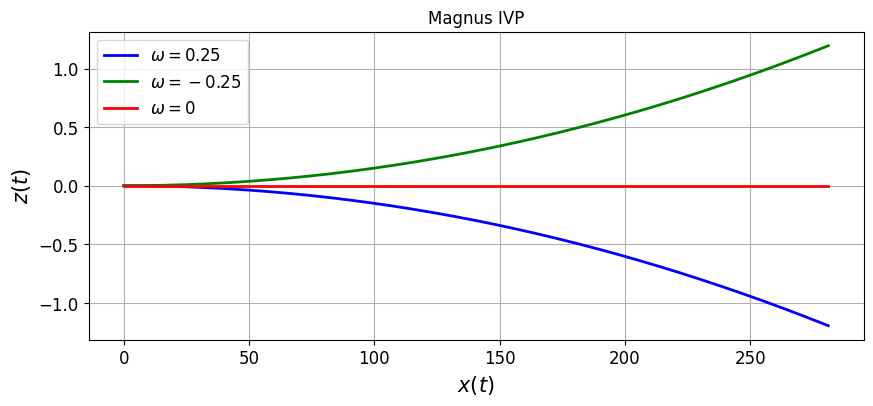

In [34]:
plt.figure(figsize=(10,4))
plt.plot(Xm1[0,:], Xm1[2,:], linewidth=2, label='$\omega = 0.25$', color='b', alpha=1)
plt.plot(Xm2[0,:], Xm2[2,:], linewidth=2, label='$\omega = -0.25$', color='g', alpha=1)
plt.plot(Xm3[0,:], Xm3[2,:], linewidth=2, label='$\omega = 0$', color='r', alpha=1)
plt.yticks(fontsize=12); plt.xticks(fontsize=12); plt.legend(fontsize=12)
plt.xlabel('$x(t)$',fontsize=15)  ; plt.ylabel('$z(t)$',fontsize=15)
plt.title('Magnus IVP',fontsize=12)
plt.grid(); plt.show()

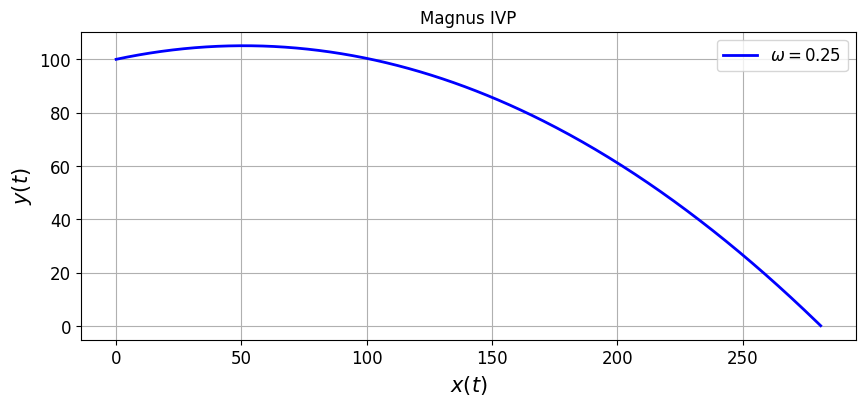

In [35]:
plt.figure(figsize=(10,4))
plt.plot(Xm1[0,:], Xm1[1,:], linewidth=2, label='$\omega = 0.25$', color='b', alpha=1)
plt.yticks(fontsize=12); plt.xticks(fontsize=12); plt.legend(fontsize=12)
plt.xlabel('$x(t)$',fontsize=15)  ; plt.ylabel('$y(t)$',fontsize=15)
plt.title('Magnus IVP',fontsize=12)
plt.grid(); plt.show()

In [36]:
print('T1 =', tm1[-1])
print('x1(T1) =',Xm1[0,-1], '    x2(T2) =',Xm2[0,-1])
print('y1(T1) =',Xm1[1,-1], '    y2(T2) =',Xm2[1,-1])
print('z1(T1) =',Xm1[2,-1], '    z2(T2) =',Xm2[2,-1])

T1 = 5.66066066066066
x1(T1) = 281.0912570135292     x2(T2) = 281.0912570135292
y1(T1) = 0.15744542244224002     y2(T2) = 0.15744542244224002
z1(T1) = -1.1946063684315205     z2(T2) = 1.1946063684315205


#### Magnus BVP: Solution ode.RK4

In [37]:
def F_Magnus1(t,X):
    g = 9.8; S = 6e-3; n = 4e-5;  w = 0.25
    v=np.sqrt(X[3]**2+X[4]**2)
    return np.array([X[3], X[4], X[5],  -1*n*v*X[3], -1*g- n*v*X[4], -1*S*w*X[3]])

In [38]:
#### Solution using Shooting + ode.RK4
S_0 = np.array([20,5,0])
def shoot1(v0):
    X,t = ode.RK4(X0=np.array([0,100,0,v0[0],v0[1],v0[2]]), t0=0.0, tN=5.6, N=1000,F=F_Magnus1)
    X_tN = np.array([281.1,0,-1.19])
    return X[:3,-1] - X_tN
vx0,vy0,vz0 = fsolve(shoot1, S_0)
Xm1,tm1 = ode.RK4(X0=np.array([0,100,0,vx0,vy0,vz0]), t0=0.0, tN=5.6, N=1000,F=F_Magnus1)

S_0 = np.array([20,5,0])
def shoot1(v0):
    X,t = ode.RK4(X0=np.array([0,100,0,v0[0],v0[1],v0[2]]), t0=0.0, tN=5.6, N=1000,F=F_Magnus2)
    X_tN = np.array([281.1,0, 1.19])
    return X[:3,-1] - X_tN
vx0,vy0,vz0 = fsolve(shoot1, S_0)
Xm2,tm2 = ode.RK4(X0=np.array([0,100,0,vx0,vy0,vz0]), t0=0.0, tN=5.6, N=1000,F=F_Magnus2)

In [39]:
print('vx(0) = ', Xm1[3,0], 'vy(0) = ', Xm1[4,0], 'vz(0) = ', Xm1[5,0])
print('x1(T1) =',Xm1[0,-1] ,',  T1 =', tm1[-1])
print('vx(0) = ', Xm2[3,0], 'vy(0) = ', Xm2[4,0], 'vz(0) = ', Xm2[5,0])
print('x2(T1) =',Xm2[0,-1] ,',  T2 =', tm2[-1])

vx(0) =  50.5430279339934 vy(0) =  9.481891780429486 vz(0) =  -0.001458672104204599
x1(T1) = 281.0999999999359 ,  T1 = 5.6
vx(0) =  50.5430279339934 vy(0) =  9.481891780429486 vz(0) =  0.0014586721042045927
x2(T1) = 281.0999999999359 ,  T2 = 5.6


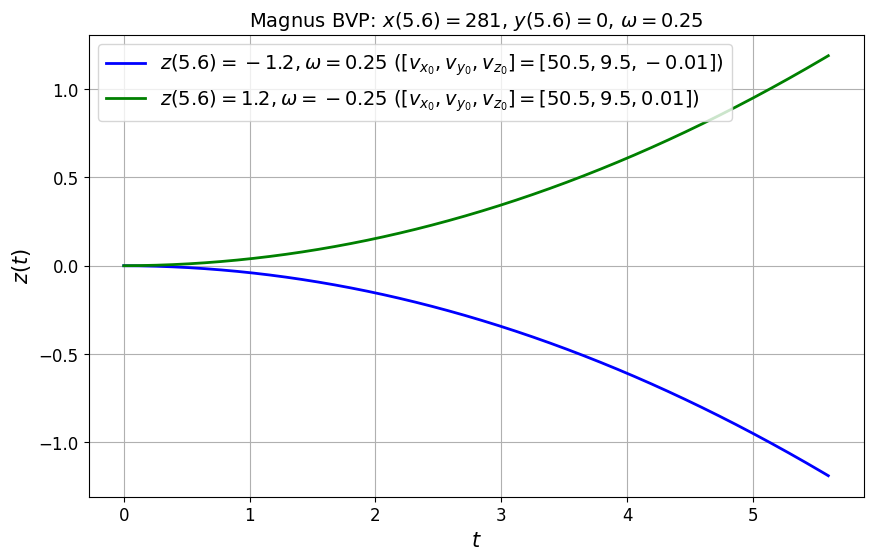

In [40]:
plt.figure(figsize=(10,6))
plt.plot(tm1, Xm1[2,:], linewidth=2, label='$ z(5.6)=-1.2, \omega=0.25 $ ($[v_{x_0},v_{y_0},v_{z_0}]=[50.5,9.5,-0.01]$)', color='b', alpha=1)
plt.plot(tm2, Xm2[2,:], linewidth=2, label='$ z(5.6)=1.2, \omega=-0.25 $ ($[v_{x_0},v_{y_0},v_{z_0}]=[50.5,9.5,0.01]$)', color='g', alpha=1)
plt.yticks(fontsize=12); plt.xticks(fontsize=12); plt.legend(fontsize=14)
plt.xlabel('$t$',fontsize=15)  ; plt.ylabel('$z(t)$',fontsize=15)
plt.title('Magnus BVP: $ x(5.6)=281 $, $ y(5.6)=0 $, $\omega = 0.25$',fontsize=14)
plt.grid(); plt.show()